In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
density_2011 = np.load('data/density_2017.npy')
print(density_2011.shape)

(17280, 8736)


In [10]:

localSolarTimes = np.linspace(0, 24, 24) # 24 
latitudes = np.linspace(-87.5, 87.5, 20) # 20
altitudes = np.linspace(100, 800, 36)    # 36

nofAlt = altitudes.shape[0]
nofLst = localSolarTimes.shape[0]
nofLat = latitudes.shape[0]

dens_reshaped = np.reshape(density_2011, (nofLst, nofLat, nofAlt, density_2011.shape[-1]), order="F")
# move last axis to the first
dens_reshaped = np.moveaxis(dens_reshaped, -1, 0)
print(dens_reshaped.shape)

(8736, 24, 20, 36)


altitude: 420.0


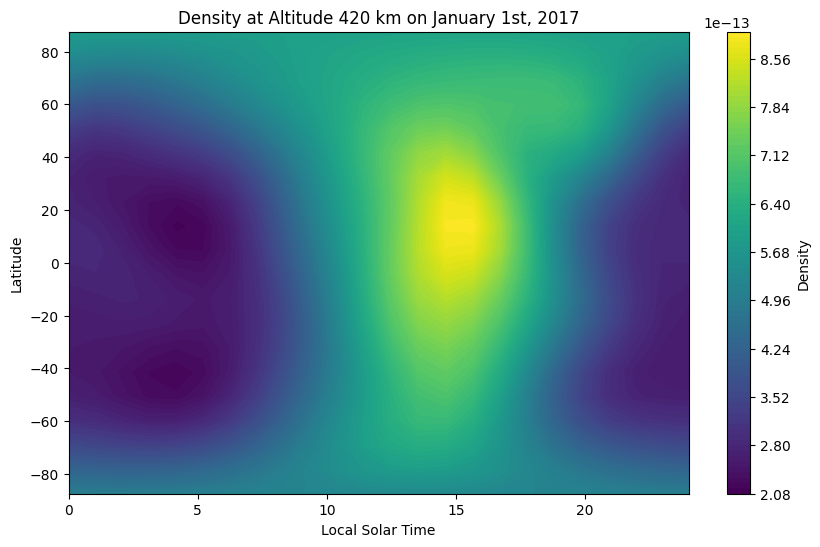

In [11]:
rho = dens_reshaped[0,  :, :, :]
# Select an altitude level to visualize, e.g., the middle altitude level
altitude_index = 16  # Approximately the middle of 36 levels
alt = altitudes[altitude_index]
print(f"altitude: {alt}")

# Plot the data for the selected hour and altitude
plt.figure(figsize=(10, 6))
plt.contourf(localSolarTimes, latitudes, rho[:, :, altitude_index].T, 100, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('Local Solar Time')
plt.ylabel('Latitude')
plt.title(f'Density at Altitude {altitudes[altitude_index]:.0f} km on January 1st, 2017')
plt.show()